In [1]:
#importing libraries here: 
import pandas as pd
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, auc, roc_auc_score
from nltk.stem.snowball import SnowballStemmer
import nltk
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.decomposition import SparsePCA, TruncatedSVD

In [2]:
# Read data
amazon = pd.read_csv("Data/kindle_review.csv")
amazon

,Unnamed: 0,rating,reviewText,summary
0,0,5,This book was the very first bookmobile book I...,50 + years ago...
1,1,1,"When I read the description for this book, I c...",Boring! Boring! Boring!
2,2,5,I just had to edit this review. This book is a...,Wiggleliscious/new toy ready/!!
3,3,5,I don't normally buy 'mystery' novels because ...,Very good read.
4,4,5,"This isn't the kind of book I normally read, a...",Great Story!
...,...,...,...,...
11995,11995,2,Had to read certain passages twice--typos. Wi...,Where's the meat?
11996,11996,3,Not what i expected. yet a very interesting bo...,Interesting
11997,11997,5,Dragon Knights is a world where Knights ride d...,"Dragon Knights, Wings of Change (I Dream of Dr..."
11998,11998,4,"Since this story is very short, it's hard to s...","Good writing, short story"


<AxesSubplot:>

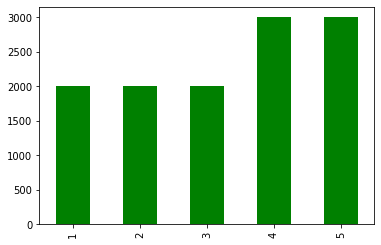

In [12]:
# Data Distribution
amazon.rating.value_counts().sort_index().plot(kind='bar',color='green')

In [6]:
X = amazon['reviewText']
y = amazon['rating']

# Split train_data into testing and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.8, random_state=3000)

## MultinomialNB

In [8]:
# Range of alpha values from 0-1
alpha = np.arange(0,1.1,0.1)

#create the vocabulary based on the training data
vect = TfidfVectorizer(ngram_range=(1,2)).fit(X_train)

#encode the words in X_train and X_val based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_val_vectorized = vect.transform(X_val)

#Iterate through each alpha value
for a in alpha:
    # Define a MultinomialNB model with current alpha value
    mnb = MultinomialNB(alpha = a).fit(X_train_vectorized, y_train)
    
    # Predict
    train_pred = mnb.predict(X_train_vectorized)
    val_pred = mnb.predict(X_val_vectorized)
    
    # Accuracy scores
    train_error = accuracy_score(y_train, train_pred)
    val_error = accuracy_score(y_val, val_pred)
    f1 = f1_score(y_val, val_pred, average='macro')
    
    print(f'alpha: {a}')
    print(f'Training score: {train_error}')
    print(f'Val score: {val_error}')
    print(f'F1 score: {f1}')

/Users/jasmineliu0114/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


alpha: 0.0
Training score: 0.999375
Val score: 0.41458333333333336
F1 score: 0.38991582501251576
alpha: 0.1
Training score: 0.9958333333333333
Val score: 0.47291666666666665
F1 score: 0.4276901325528718
alpha: 0.2
Training score: 0.9755208333333333
Val score: 0.435
F1 score: 0.37623183362968227
alpha: 0.30000000000000004
Training score: 0.9214583333333334
Val score: 0.41458333333333336
F1 score: 0.34505139263371226
alpha: 0.4
Training score: 0.86
Val score: 0.40541666666666665
F1 score: 0.32820412167533575
alpha: 0.5
Training score: 0.8046875
Val score: 0.3975
F1 score: 0.3128675284872132
alpha: 0.6000000000000001
Training score: 0.7539583333333333
Val score: 0.38875
F1 score: 0.2965297320669956
alpha: 0.7000000000000001
Training score: 0.7125
Val score: 0.38333333333333336
F1 score: 0.28743466523697564
alpha: 0.8
Training score: 0.6784375
Val score: 0.3775
F1 score: 0.27680023974909845
alpha: 0.9
Training score: 0.650625
Val score: 0.3720833333333333
F1 score: 0.26779403362673443
alph

## Logistic Regression

### One-vs-Rest

In [9]:
# Range of min_df values from 0-10
min_df = range(11)

# Iterate through min_df values
for m in min_df:
    #create the vocabulary based on the training data
    vect = TfidfVectorizer(min_df=m, ngram_range=(1,2)).fit(X_train)

    #encode the words in X_train and X_val based on the vocabulary
    X_train_vectorized = vect.transform(X_train)
    X_val_vectorized = vect.transform(X_val)

    # Pass a LogisticRegression model through a OneVsRestClassifier object
    ovr = OneVsRestClassifier(LogisticRegression(n_jobs = -1))
    ovr.fit(X_train_vectorized, y_train)
    
    # Predict
    train_pred = ovr.predict(X_train_vectorized)
    val_pred = ovr.predict(X_val_vectorized)
    
    # Accuracy scores
    train_score = accuracy_score(train_pred, y_train)
    val_score = accuracy_score(val_pred, y_val)
    f1 = f1_score(y_val, val_pred, average='macro')

    print(m)
    print(f"train error: {1-train_score}")
    print(f"test error: {1-val_score}")
    print(f'F1 score: {f1}')

0
train error: 0.10364583333333333
test error: 0.48624999999999996
F1 score: 0.48770011238311783
1
train error: 0.10364583333333333
test error: 0.48624999999999996
F1 score: 0.48770011238311783
2
train error: 0.13406249999999997
test error: 0.48416666666666663
F1 score: 0.48822465349308625
3
train error: 0.1511458333333333
test error: 0.4816666666666667
F1 score: 0.4923143078194438
4
train error: 0.16312499999999996
test error: 0.48750000000000004
F1 score: 0.4866250953345087
5
train error: 0.17197916666666668
test error: 0.48583333333333334
F1 score: 0.48785617974044093
6
train error: 0.18041666666666667
test error: 0.48750000000000004
F1 score: 0.48717869042151934
7
train error: 0.1869791666666667
test error: 0.48958333333333337
F1 score: 0.4849772709425877
8
train error: 0.19281250000000005
test error: 0.4870833333333333
F1 score: 0.4876138833361317
9
train error: 0.19843750000000004
test error: 0.4883333333333333
F1 score: 0.4870891151864976
10
train error: 0.20281249999999995
test

### One-vs-One

In [10]:
# Range of min_df values from 0-10
min_df = range(11)

# Iterate through min_df values
for m in min_df:
    #create the vocabulary based on the training data
    vect = TfidfVectorizer(min_df=m, ngram_range=(1,2)).fit(X_train)

    #encode the words in X_train and X_val based on the vocabulary
    X_train_vectorized = vect.transform(X_train)
    X_val_vectorized = vect.transform(X_val)

    # Pass a LogisticRegression model through a OneVsOneClassifier object
    ovo = OneVsOneClassifier(LogisticRegression(n_jobs = -1))
    ovo.fit(X_train_vectorized, y_train)
    ovo.fit(X_train_vectorized, y_train)
    
    # Predict
    train_pred = ovo.predict(X_train_vectorized)
    val_pred = ovo.predict(X_val_vectorized)
    
    # Accuracy scores
    train_score = accuracy_score(train_pred, y_train)
    val_score = accuracy_score(val_pred, y_val)
    f1 = f1_score(y_val, val_pred, average='macro')

    print(m)
    print(f"train error: {1-train_score}")
    print(f"test error: {1-val_score}")
    print(f'F1 score: {f1}')

0
train error: 0.14718750000000003
test error: 0.4979166666666667
F1 score: 0.4777461333324117
1
train error: 0.14718750000000003
test error: 0.4979166666666667
F1 score: 0.4777461333324117
2
train error: 0.17729166666666663
test error: 0.49291666666666667
F1 score: 0.48273185362490256
3
train error: 0.1908333333333333
test error: 0.48750000000000004
F1 score: 0.4890071632071617
4
train error: 0.20020833333333332
test error: 0.49083333333333334
F1 score: 0.4870153752322424
5
train error: 0.20697916666666671
test error: 0.49124999999999996
F1 score: 0.4874473404757638
6
train error: 0.2136458333333333
test error: 0.48958333333333337
F1 score: 0.48936268050064086
7
train error: 0.21999999999999997
test error: 0.4883333333333333
F1 score: 0.490790446429194
8
train error: 0.2242708333333333
test error: 0.48875
F1 score: 0.4906374455286545
9
train error: 0.23020833333333335
test error: 0.48916666666666664
F1 score: 0.4901985040245023
10
train error: 0.2348958333333333
test error: 0.48541666

## KNN

In [ ]:
# Range of min_df values from 0-10
min_df = range(11)

# Iterate through min_df values
for m in min_df:
    #create the vocabulary based on the training data
    vect = TfidfVectorizer(min_df=m, ngram_range=(1,2)).fit(X_train)

    #encode the words in X_train and X_val based on the vocabulary
    X_train_vectorized = vect.transform(X_train)
    X_val_vectorized = vect.transform(X_val)

    # Define a KNeighborsClassifier model
    knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
    knn.fit(X_train_vectorized, y_train)
    
    # Predict
    train_pred = knn.predict(X_train_vectorized)
    val_pred = knn.predict(X_val_vectorized)
    
    # Accuracy scores
    train_score = accuracy_score(train_pred, y_train)
    val_score = accuracy_score(val_pred, y_val)
    f1 = f1_score(y_val, val_pred, average='macro')

    print(m)
    print(f"train error: {1-train_score}")
    print(f"test error: {1-val_score}")
    print(f'F1 score: {f1}')

## Decision Tree

In [ ]:
# Without pruning conditions
#create the vocabulary based on the training data
vect = TfidfVectorizer(ngram_range=(1,2)).fit(X_train)

#encode the words in X_train and X_val based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_val_vectorized = vect.transform(X_val)

# Define DecisionTreeClassifier model
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train_vectorized, y_train)

# Predict
train_pred = dtc.predict(X_train_vectorized)
val_pred = dtc.predict(X_val_vectorized)
  
# Accuracy scores
train_score = accuracy_score(train_pred, y_train)
val_score = accuracy_score(val_pred, y_val)
f1 = f1_score(y_val, val_pred, average='macro')

print(f"train error: {1-train_score}")
print(f"test error: {1-val_score}")
print(f'F1 score: {f1}')

In [ ]:
# Hyperparameters
max_depth = [x for x in range(1, 11)]
min_samples_split = [x for x in range(2, 11)]
min_samples_leaf = [x for x in range(1, 11)]
param_grid = {'max_depth': max_depth, 'min_samples_split': min_samples_split, 
              'min_samples_leaf': min_samples_leaf}

#create the vocabulary based on the training data
vect = TfidfVectorizer(ngram_range=(1,2)).fit(X_train)

#encode the words in X_train and X_val based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_val_vectorized = vect.transform(X_val)

# Define a DecisionTreeRegressor model
dtc = DecisionTreeClassifier(random_state=0)

# Perform random search cv on the decision tree model to determine the best
# max_depth, min_samples_split , and min_samples leaf values
dtc_cv = RandomizedSearchCV(dtc, param_grid, cv=10, n_jobs=-1, random_state=123)
dtc_cv.fit(X_train_vectorized, y_train)

# The best parameters
best_md = dtc_cv.best_params_['max_depth']
best_mss = dtc_cv.best_params_['min_samples_split']
best_msl = dtc_cv.best_params_['min_samples_leaf']
print('Best max depth: ' + str(best_md))
print('Best min samples split: ' + str(best_mss))
print('Best min samples leaf: ' + str(best_msl))

# Predict
train_pred = dtc_cv.predict(X_train_vectorized)
val_pred = dtc_cv.predict(X_val_vectorized)
    
# Accuracy scores
train_score = accuracy_score(train_pred, y_train)
val_score = accuracy_score(val_pred, y_val)
f1 = f1_score(y_val, val_pred, average='macro')

print(f"train error: {1-train_score}")
print(f"test error: {1-val_score}")
print(f'F1 score: {f1}')

## Random Forest

In [ ]:
# Without pruning conditions
#create the vocabulary based on the training data
vect = TfidfVectorizer(ngram_range=(1,2)).fit(X_train)

#encode the words in X_train and X_val based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_val_vectorized = vect.transform(X_val)

# Define a RandomForestClassifier model
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train_vectorized, y_train)

# Predict
train_pred = rfc.predict(X_train_vectorized)
val_pred = rfc.predict(X_val_vectorized)
    
# Accuracy scores
train_score = accuracy_score(train_pred, y_train)
val_score = accuracy_score(val_pred, y_val)
f1 = f1_score(y_val, val_pred, average='macro')

print(f"train error: {1-train_score}")
print(f"test error: {1-val_score}")
print(f'F1 score: {f1}')

In [ ]:
# Hyperparameters
max_depth = [x for x in range(1, 11)]
num_trees = [1, 50, 100, 150, 200, 300, 400]
param_grid = {'max_depth': max_depth, 'n_estimators': num_trees}

#create the vocabulary based on the training data
vect = TfidfVectorizer(ngram_range=(1,2)).fit(X_train)

#encode the words in X_train and X_val based on the vocabulary
X_train_vectorized = vect.transform(X_train)
X_val_vectorized = vect.transform(X_val)

# Define a RandomForestClassifier model
rfc = RandomForestClassifier(random_state=0)

# Perform random search cv on the random forest model to determine the best
# n_estimators and max_depth values
rfc_cv = RandomizedSearchCV(rfc, param_grid, cv=10, n_jobs=-1, random_state=123)
rfc_cv.fit(X_train_vectorized, y_train)

# The best parameters
best_md = rfc_cv.best_params_['max_depth']
best_ne = rfc_cv.best_params_['n_estimators']
print('Best max depth: ' + str(best_md))
print('Best number of trees: ' + str(best_ne))

# Predict
train_pred = rfc_cv.predict(X_train_vectorized)
val_pred = rfc_cv.predict(X_val_vectorized)
    
# Accuracy scores
train_score = accuracy_score(train_pred, y_train)
val_score = accuracy_score(val_pred, y_val)
f1 = f1_score(y_val, val_pred, average='macro')

print(f"train error: {1-train_score}")
print(f"test error: {1-val_score}")
print(f'F1 score: {f1}')